In [3]:
import numpy as np
import pandas as pd
from astropy.io import ascii
from astropy.coordinates import SkyCoord
from astropy import units as u
import os
import matplotlib.pyplot as plt
import mpl_scatter_density

# Comparing catalogue (vG+2023)

In [4]:
df_vg =  pd.read_csv('Catalogues/NGC1027_vG2023+GaiaDR3.csv')
df_vg

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,...,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist
0,NGC_1027,465694821355155328,40.505659,61.784374,0.8964,-1.773,2.155,14.814943,15.274859,14.164726,...,0.3645,0.3534,0.3740,MARCS,40.505676,61.784365,0.326353,0.357943,-0.0824,0.0
1,NGC_1027,465694748331683200,40.523624,61.774185,0.9010,-1.622,2.198,17.604593,18.443653,16.716528,...,0.5752,0.5552,0.5943,MARCS,40.523639,61.774175,1.399436,1.442121,-0.1402,0.0
2,NGC_1027,465694683916216192,40.469041,61.767109,0.8540,-1.558,2.617,11.923204,12.138940,11.557860,...,0.6047,0.5997,0.6143,A,40.469056,61.767097,0.239440,0.276221,-0.0846,0.0
3,NGC_1027,465694610893071872,40.502789,61.752454,1.0832,-1.671,2.008,17.968418,18.876163,17.032963,...,0.4264,0.4069,0.4445,PHOENIX,40.502805,61.752445,1.819094,1.953410,-0.1343,0.0
4,NGC_1027,465694546477250432,40.544690,61.776256,0.9628,-1.686,2.204,17.046154,17.778336,16.227764,...,0.3364,0.3138,0.3570,PHOENIX,40.544705,61.776246,1.001668,1.054554,-0.1104,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,NGC_1027,465695474182156288,40.406755,61.776293,0.7598,-2.144,2.240,20.454760,21.504877,19.255125,...,NaN,NaN,NaN,NaN,40.406775,61.776283,10.129286,10.781652,-0.1126,0.0
1376,NGC_1027,465695435526822656,40.459302,61.776889,0.9625,-1.842,1.912,17.249964,17.985037,16.378658,...,0.3898,0.3664,0.4093,PHOENIX,40.459319,61.776881,1.298300,1.377348,-0.1684,0.0
1377,NGC_1027,465695126289128576,40.340698,61.742587,0.6292,-1.685,2.128,19.259914,20.094313,18.372610,...,NaN,NaN,NaN,NaN,40.340714,61.742578,4.578806,5.166427,-0.2178,0.0
1378,NGC_1027,465695096222913152,40.387508,61.768844,0.3626,-1.220,2.507,20.064852,21.051865,18.944124,...,NaN,NaN,NaN,NaN,40.387520,61.768833,8.462630,8.415401,0.0792,0.0


In [5]:
jj, = np.where(df_vg.Pmemb >= 0.7)
dfvg = df_vg.iloc[jj]

In [6]:
dfvg

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,...,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist
0,NGC_1027,465694821355155328,40.505659,61.784374,0.8964,-1.773,2.155,14.814943,15.274859,14.164726,...,0.3645,0.3534,0.3740,MARCS,40.505676,61.784365,0.326353,0.357943,-0.0824,0.0
1,NGC_1027,465694748331683200,40.523624,61.774185,0.9010,-1.622,2.198,17.604593,18.443653,16.716528,...,0.5752,0.5552,0.5943,MARCS,40.523639,61.774175,1.399436,1.442121,-0.1402,0.0
2,NGC_1027,465694683916216192,40.469041,61.767109,0.8540,-1.558,2.617,11.923204,12.138940,11.557860,...,0.6047,0.5997,0.6143,A,40.469056,61.767097,0.239440,0.276221,-0.0846,0.0
3,NGC_1027,465694610893071872,40.502789,61.752454,1.0832,-1.671,2.008,17.968418,18.876163,17.032963,...,0.4264,0.4069,0.4445,PHOENIX,40.502805,61.752445,1.819094,1.953410,-0.1343,0.0
4,NGC_1027,465694546477250432,40.544690,61.776256,0.9628,-1.686,2.204,17.046154,17.778336,16.227764,...,0.3364,0.3138,0.3570,PHOENIX,40.544705,61.776246,1.001668,1.054554,-0.1104,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1372,NGC_1027,465699421256538368,40.269906,61.848165,0.9031,-1.868,1.933,17.708502,18.587675,16.822248,...,0.4368,0.3484,0.4884,PHOENIX,40.269923,61.848156,1.550565,1.533550,-0.1668,0.0
1373,NGC_1027,465699215097697664,40.361267,61.884989,0.8797,-1.744,2.062,16.665634,17.330374,15.860227,...,0.5042,0.4890,0.5181,MARCS,40.361283,61.884980,0.833605,0.912919,-0.1607,0.0
1374,NGC_1027,465695474190193408,40.427435,61.781116,0.7913,-1.737,2.134,16.822556,17.511656,16.019714,...,0.6440,0.6199,0.6546,PHOENIX,40.427452,61.781107,0.928986,0.960028,-0.1326,0.0
1376,NGC_1027,465695435526822656,40.459302,61.776889,0.9625,-1.842,1.912,17.249964,17.985037,16.378658,...,0.3898,0.3664,0.4093,PHOENIX,40.459319,61.776881,1.298300,1.377348,-0.1684,0.0


# 5 Populations

In [7]:
p1 = pd.read_csv('Catalogues/pop1_NGC1027_GMM4.csv')
p2 = pd.read_csv('Catalogues/pop2_NGC1027_GMM4.csv')
p3 = pd.read_csv('Catalogues/pop3_NGC1027_GMM4.csv')
p4 = pd.read_csv('Catalogues/pop4_NGC1027_GMM4.csv')
p5 = pd.read_csv('Catalogues/pop5_NGC1027_GMM4.csv')

## Computing Completeness and Purity

### Population 1

In [8]:
ra1 = p1.RAJ2000
dec1 = p1.DEJ2000

ra2 = dfvg.RAJ2000
dec2 = dfvg.DEJ2000

In [9]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [10]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [11]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [12]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [13]:
p1.iloc[matched_idx_catalog1]


,RAJ2000,DEJ2000,pmRA,pmDE,Gmag,BP-RP,Plx,cluster
144,41.773842,60.540364,-1.799,2.160,17.921892,1.896875,0.8545,0
159,41.391990,60.440964,-1.793,1.868,15.092919,1.412945,0.8665,0
180,41.760699,60.667437,-1.459,2.020,15.022243,1.328855,0.9060,0
187,41.971382,60.869417,-1.530,2.133,13.546622,0.857985,0.8965,0
193,41.851700,60.892318,-1.809,1.878,12.826741,0.889601,0.9197,0
...,...,...,...,...,...,...,...,...
1567,41.991470,62.738418,-1.732,2.268,16.083628,1.326920,0.9009,0
1618,41.114905,62.905420,-1.936,2.048,8.369972,1.432346,0.9308,0
1635,40.787309,63.076058,-1.898,2.113,16.967535,1.562469,0.8373,0
1788,38.075178,62.268490,-1.970,2.068,14.957641,1.144249,0.8460,0


In [14]:
dfvg.iloc[matched_idx_catalog2]

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,...,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist
779,NGC_1027,464776037646911104,41.773826,60.540374,0.8545,-1.799,2.160,17.921892,18.853360,16.956484,...,0.4450,0.4032,0.5247,PHOENIX,41.773842,60.540364,1.608477,1.663375,-0.1617,0.0
859,NGC_1027,464797963461759488,41.391974,60.440972,0.8665,-1.793,1.868,15.092919,15.710403,14.297459,...,1.0850,1.0804,1.0892,MARCS,41.391990,60.440964,0.358247,0.381025,-0.1236,0.0
687,NGC_1027,464824798418117120,41.760686,60.667446,0.9060,-1.459,2.020,15.022243,15.609508,14.280652,...,0.9842,0.9744,0.9895,MARCS,41.760699,60.667437,0.355979,0.334857,-0.1361,0.0
669,NGC_1027,464833766309733248,41.971368,60.869426,0.8965,-1.530,2.133,13.546622,13.889764,13.031779,...,0.8384,0.8376,0.8392,A,41.971382,60.869417,0.208742,0.191189,-0.1311,0.0
673,NGC_1027,464836652527754368,41.851684,60.892326,0.9197,-1.809,1.878,12.826741,13.182690,12.293089,...,NaN,NaN,NaN,NaN,41.851700,60.892318,0.215535,0.196625,-0.0597,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,NGC_1027,467345360106608000,41.991454,62.738428,0.9009,-1.732,2.268,16.083628,16.674650,15.347731,...,0.4250,0.4146,0.4355,MARCS,41.991470,62.738418,0.643855,0.764214,-0.1848,0.0
452,NGC_1027,467535884855567872,41.114886,62.905429,0.9308,-1.936,2.048,8.369972,9.017055,7.584709,...,NaN,NaN,NaN,NaN,41.114905,62.905420,0.294193,0.310339,-0.1056,0.0
83,NGC_1027,467553236523330816,40.787290,63.076067,0.8373,-1.898,2.113,16.967535,17.682224,16.119755,...,0.4930,0.4739,0.5081,PHOENIX,40.787309,63.076058,1.053457,1.116594,-0.3722,0.0
540,NGC_1027,513984032015800064,38.075159,62.268499,0.8460,-1.970,2.068,14.957641,15.442095,14.297846,...,0.6394,0.6258,0.6546,A,38.075178,62.268490,0.337357,0.360956,-0.0547,0.0


Text(0, 0.5, 'DEC (deg)')

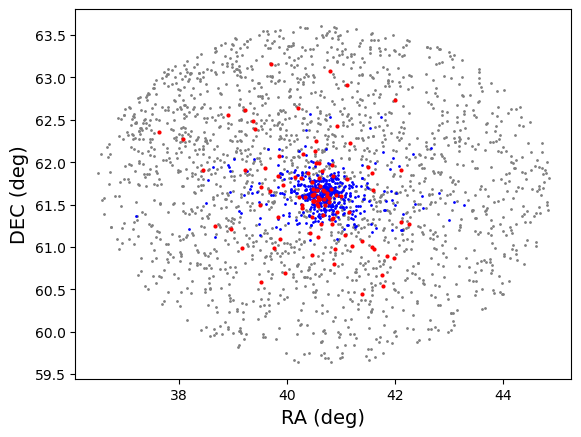

In [15]:
fig, ax = plt.subplots()

ax.scatter(p1.RAJ2000, p1.DEJ2000, s=1, c='grey')
ax.scatter(dfvg.RAJ2000, dfvg.DEJ2000, s=1, c='b')
ax.scatter(p1.iloc[matched_idx_catalog1].RAJ2000, p1.iloc[matched_idx_catalog1].DEJ2000, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
# ax.set_ylim(-11.5,-14.2)
# ax.set_xlim(121.2,124.5)

In [16]:
dfvg_t = len(dfvg)
p1_t = len(p1.iloc[matched_idx_catalog1])

Completeness


In [17]:
p1_c = p1_t /dfvg_t
p1_c*100

17.252931323283082

Pureness

In [18]:
p1_p = p1_t/len(p1)
p1_p*100

5.114200595829196

### Population 2

In [19]:
ra1 = p2.RAJ2000
dec1 = p2.DEJ2000

ra2 = dfvg.RAJ2000
dec2 = dfvg.DEJ2000

In [20]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [21]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [22]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [23]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [24]:
p2

,RAJ2000,DEJ2000,pmRA,pmDE,Gmag,BP-RP,Plx,cluster
0,39.647633,59.684391,-2.455,0.226,19.534328,2.221422,0.8802,1
1,39.763393,59.737275,-3.296,0.773,14.241471,1.400116,1.0608,1
2,39.965756,59.894379,-3.093,0.268,20.881147,1.647907,0.8628,1
3,39.994778,59.923427,-2.487,0.338,20.309158,2.035408,1.0592,1
4,40.000439,60.037747,-2.302,0.252,19.857098,2.159866,0.8939,1
...,...,...,...,...,...,...,...,...
430,39.981688,63.455836,-0.561,0.101,19.463900,2.313620,0.8954,1
431,39.727641,63.469806,-0.722,0.728,19.633500,2.132420,1.0002,1
432,39.127973,63.345043,-2.032,0.672,19.050467,1.931339,0.8602,1
433,39.081198,63.377767,-2.159,0.121,20.121077,1.596626,0.9258,1


In [25]:
p2.iloc[matched_idx_catalog1]


,RAJ2000,DEJ2000,pmRA,pmDE,Gmag,BP-RP,Plx,cluster


In [26]:
dfvg.iloc[matched_idx_catalog2]

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,...,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist


Text(0, 0.5, 'DEC (deg)')

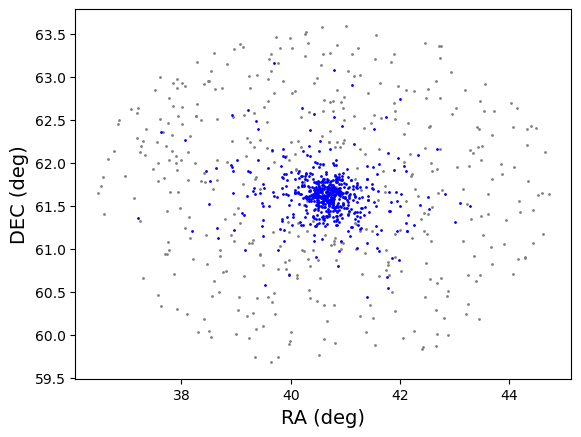

In [27]:
fig, ax = plt.subplots()

ax.scatter(p2.RAJ2000, p2.DEJ2000, s=1, c='grey')
ax.scatter(dfvg.RAJ2000, dfvg.DEJ2000, s=1, c='b')
ax.scatter(p2.iloc[matched_idx_catalog1].RAJ2000, p2.iloc[matched_idx_catalog1].DEJ2000, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
# ax.set_ylim(-11.5,-14.2)
# ax.set_xlim(121.2,124.5)

In [28]:
dfvg_t = len(dfvg)
p2_t = len(p2.iloc[matched_idx_catalog1])

Completeness


In [29]:
p2_c = p2_t /dfvg_t
p2_c*100

0.0

Pureness

In [30]:
p2_p = p2_t/len(p2)
p2_p*100

0.0

### Population 3

In [31]:
ra1 = p3.RAJ2000
dec1 = p3.DEJ2000

ra2 = dfvg.RAJ2000
dec2 = dfvg.DEJ2000

In [32]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [33]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [34]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [35]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [36]:
p3.iloc[matched_idx_catalog1]


,RAJ2000,DEJ2000,pmRA,pmDE,Gmag,BP-RP,Plx,cluster
0,42.998844,61.313695,-1.570,2.043,16.328817,1.396971,0.8683,2
1,43.278897,61.494618,-1.534,2.108,15.445359,1.258800,0.8847,2
2,41.951460,61.204688,-1.660,1.738,16.049967,1.337310,0.9042,2
3,41.570289,61.173400,-1.596,2.023,16.192581,1.385247,0.8300,2
4,41.654516,61.223737,-1.741,1.936,16.519371,1.419205,0.9554,2
...,...,...,...,...,...,...,...,...
388,38.925701,61.948183,-1.848,1.812,16.637203,1.540484,0.8856,2
389,38.908028,61.971698,-1.825,1.847,15.655247,1.433902,0.8615,2
390,38.626786,61.938464,-1.904,2.152,15.519888,1.342092,0.8781,2
391,40.356295,62.084891,-1.865,1.984,17.112860,1.566267,0.9350,2


In [37]:
dfvg.iloc[matched_idx_catalog2]

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,...,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist
587,NGC_1027,464916985594901504,42.998829,61.313704,0.8683,-1.570,2.043,16.328817,16.959078,15.562107,...,0.3618,0.3491,0.3712,PHOENIX,42.998844,61.313695,0.661760,0.633674,-0.1152,0.0
415,NGC_1027,464925781687795712,43.278883,61.494627,0.8847,-1.534,2.108,15.445359,15.993872,14.735071,...,0.5841,0.5643,0.5938,MARCS,43.278897,61.494618,0.484497,0.403216,-0.1645,0.0
407,NGC_1027,464947806280926464,41.951445,61.204695,0.9042,-1.660,1.738,16.049967,16.642725,15.305415,...,0.2506,0.2272,0.2669,MARCS,41.951460,61.204688,0.554954,0.605513,-0.0247,0.0
385,NGC_1027,464949661706849280,41.570274,61.173409,0.8300,-1.596,2.023,16.192581,16.815716,15.430469,...,0.4325,0.4067,0.4524,MARCS,41.570289,61.173400,0.565584,0.578736,-0.0684,0.0
383,NGC_1027,464950211462625792,41.654500,61.223746,0.9554,-1.741,1.936,16.519371,17.166830,15.747625,...,0.4332,0.4085,0.4866,PHOENIX,41.654516,61.223737,0.689309,0.694405,0.0169,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,NGC_1027,465924103888287232,38.925684,61.948191,0.8856,-1.848,1.812,16.637203,17.355324,15.814839,...,0.6284,0.6148,0.6461,MARCS,38.925701,61.948183,0.704856,0.743628,-0.0640,0.0
979,NGC_1027,465924172607759104,38.908010,61.971706,0.8615,-1.825,1.847,15.655247,16.300783,14.866881,...,0.6605,0.6567,0.6645,MARCS,38.908028,61.971698,0.467464,0.500334,-0.0968,0.0
975,NGC_1027,465925924954246656,38.626768,61.938473,0.8781,-1.904,2.152,15.519888,16.112760,14.770668,...,0.6285,0.6248,0.6324,MARCS,38.626786,61.938464,0.407226,0.439171,0.0143,0.0
944,NGC_1027,465984336508841088,40.356277,62.084900,0.9350,-1.865,1.984,17.112860,17.850330,16.284063,...,0.4242,0.4092,0.4358,MARCS,40.356295,62.084891,1.100971,1.150360,-0.1749,0.0


Text(0, 0.5, 'DEC (deg)')

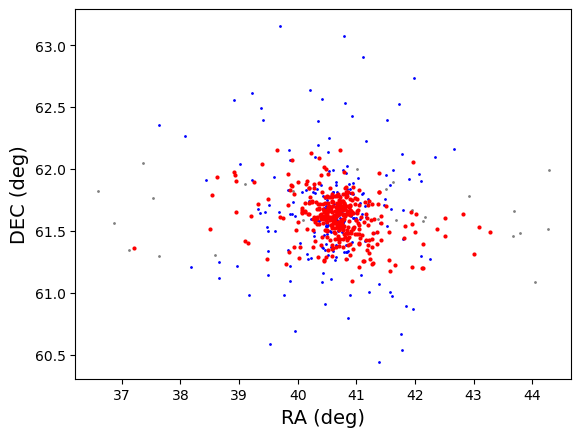

In [38]:
fig, ax = plt.subplots()

ax.scatter(p3.RAJ2000, p3.DEJ2000, s=1, c='grey')
ax.scatter(dfvg.RAJ2000, dfvg.DEJ2000, s=1, c='b')
ax.scatter(p3.iloc[matched_idx_catalog1].RAJ2000, p3.iloc[matched_idx_catalog1].DEJ2000, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
# ax.set_ylim(-11.5,-14.2)
# ax.set_xlim(121.2,124.5)

In [39]:
dfvg_t = len(dfvg)
p3_t = len(p3.iloc[matched_idx_catalog1])

Completeness


In [40]:
p3_c = p3_t /dfvg_t
p3_c*100

62.981574539363486

Pureness

In [41]:
p3_p = p3_t/len(p3)
p3_p*100

93.06930693069307

### Population 4

In [42]:
ra1 = p4.RAJ2000
dec1 = p4.DEJ2000

ra2 = dfvg.RAJ2000
dec2 = dfvg.DEJ2000

In [43]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [44]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [45]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [46]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [47]:
p4.iloc[matched_idx_catalog1]


,RAJ2000,DEJ2000,pmRA,pmDE,Gmag,BP-RP,Plx,cluster
271,38.665583,61.121015,-2.019,2.163,16.952963,1.708639,0.9549,3
342,40.422413,61.087284,-1.824,1.933,17.097599,1.682651,1.0374,3
360,40.607975,61.336185,-1.467,1.869,15.721642,1.443523,0.9886,3
366,40.831929,61.387547,-1.543,1.789,16.774263,1.534787,0.9779,3
382,40.166307,61.316390,-1.909,2.100,17.870052,1.944721,0.9878,3
397,40.566990,61.368914,-1.915,2.059,17.594540,1.818642,1.0062,3
398,40.409094,61.370086,-1.931,1.945,15.468059,1.375162,0.9994,3
399,40.440674,61.468831,-1.978,1.860,17.791061,1.814960,0.9823,3
400,40.648903,61.385975,-1.490,1.871,18.116726,2.069979,0.9612,3
403,40.496804,61.471120,-1.795,2.149,18.243969,1.935892,1.0050,3


In [48]:
dfvg.iloc[matched_idx_catalog2]

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,...,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist
851,NGC_1027,465462377723163776,38.665564,61.121025,0.9549,-2.019,2.163,16.952963,17.767070,16.058432,...,0.6107,0.5904,0.6388,PHOENIX,38.665583,61.121015,0.983082,1.052107,-0.0721,0.0
1367,NGC_1027,465593494484211712,40.422396,61.087292,1.0374,-1.824,1.933,17.097599,17.905810,16.223158,...,0.5884,0.5729,0.6067,PHOENIX,40.422413,61.087284,1.107096,1.028673,-0.0489,0.0
1097,NGC_1027,465621016635641856,40.607961,61.336193,0.9886,-1.467,1.869,15.721642,16.366010,14.922488,...,0.8980,0.8925,0.9041,PHOENIX,40.607975,61.336185,0.604599,0.684301,-0.0977,0.0
1274,NGC_1027,465626514193723776,40.831915,61.387555,0.9779,-1.543,1.789,16.774263,17.491129,15.956342,...,0.6897,0.6673,0.7002,PHOENIX,40.831929,61.387547,0.793681,0.898322,-0.0690,0.0
982,NGC_1027,465646369819233152,40.166289,61.316399,0.9878,-1.909,2.100,17.870052,18.870697,16.925976,...,0.5783,0.5386,0.6168,PHOENIX,40.166307,61.316390,1.612400,1.622350,-0.0965,0.0
983,NGC_1027,465668016457919872,40.566973,61.368923,1.0062,-1.915,2.059,17.594540,18.462423,16.643782,...,0.7697,0.7443,0.8029,MARCS,40.566990,61.368914,1.444462,1.429150,-0.2276,0.0
1057,NGC_1027,465668776673798912,40.409076,61.370094,0.9994,-1.931,1.945,15.468059,16.067920,14.692759,...,0.7001,0.6972,0.7030,PHOENIX,40.409094,61.370086,0.412854,0.455687,-0.0446,0.0
1089,NGC_1027,465672517580321792,40.440656,61.468839,0.9823,-1.978,1.860,17.791061,18.687458,16.872498,...,0.0852,0.0799,0.0921,PHOENIX,40.440674,61.468831,1.598830,1.607983,-0.0518,0.0
1077,NGC_1027,465673960692692864,40.648889,61.385984,0.9612,-1.490,1.871,18.116726,19.189540,17.119562,...,0.5237,0.4970,0.5549,PHOENIX,40.648903,61.385975,1.796725,2.071885,-0.1392,0.0
1004,NGC_1027,465675403798349184,40.496787,61.471130,1.0050,-1.795,2.149,18.243969,19.219248,17.283356,...,0.1285,0.1128,0.1494,PHOENIX,40.496804,61.471120,1.951687,2.159553,-0.1109,0.0


Text(0, 0.5, 'DEC (deg)')

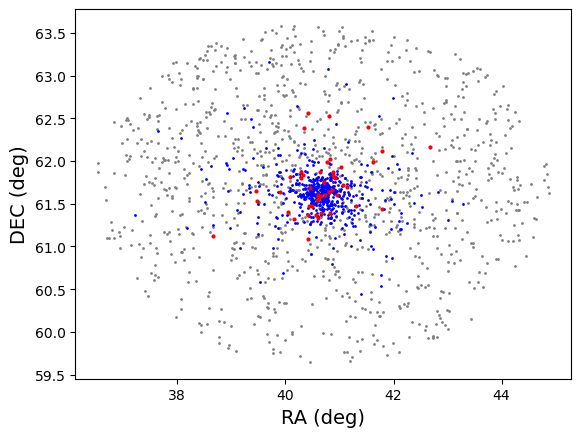

In [49]:
fig, ax = plt.subplots()

ax.scatter(p4.RAJ2000, p4.DEJ2000, s=1, c='grey')
ax.scatter(dfvg.RA_ICRS, dfvg.DE_ICRS, s=1, c='b')
ax.scatter(p4.iloc[matched_idx_catalog1].RAJ2000, p4.iloc[matched_idx_catalog1].DEJ2000, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
# ax.set_ylim(-11.5,-14.2)
# ax.set_xlim(121.2,124.5)

In [50]:
dfvg_t = len(dfvg)
p4_t = len(p4.iloc[matched_idx_catalog1])

Completeness


In [51]:
p4_c = p4_t /dfvg_t
p4_c*100

7.872696817420436

Pureness

In [52]:
p4_p = p4_t/len(p4)
p4_p*100

4.115586690017513

## Analyzing

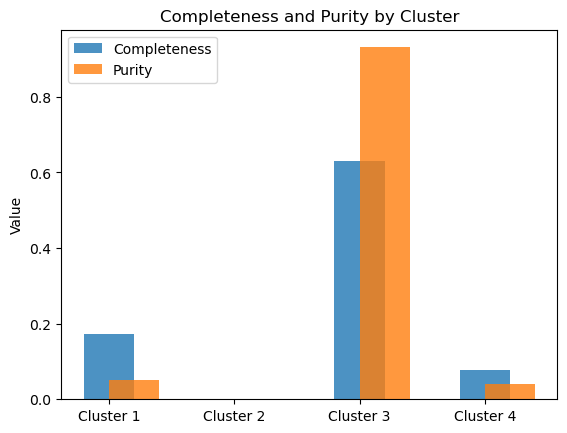

In [64]:
import seaborn as sns

# Dados simulados: completude e pureza por cluster
clusters = [1, 2, 3, 4]
completeness = [p1_c, p2_c, p3_c, p4_c]  # Exemplo de completude
purity = [p1_p, p2_p, p3_p, p4_p]  # Exemplo de pureza

# Bar plot
x = range(len(clusters))
plt.bar(x, completeness, width=0.4, label="Completeness", alpha=0.8, align='center')
plt.bar(x, purity, width=0.4, label="Purity", alpha=0.8, align='edge')

plt.xticks(x, [f"Cluster {c}" for c in clusters])
plt.ylabel("Value")
plt.title("Completeness and Purity by Cluster")
plt.legend()
plt.show()